In [1]:
#Import libraries
from pyspark.context import SparkContext
from pyspark.sql.context import SQLContext
from pyspark.sql.session import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.linalg import Vectors

In [2]:
#Create a spark context
sc = SparkContext()
sqlContext = SQLContext(sc)
spark = SparkSession(sc)

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [4]:
sns.set()
style.use('ggplot')

In [5]:
#Read the account table
account = sqlContext.read.load(r'C:\Users\ASUS\Downloads\berka\account.csv', 
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true')

df_account = account.toPandas()
df_account

,account_id,district_id,frequency,date_account
0,576,55,POPLATEK MESICNE,01/01/1993
1,3818,74,POPLATEK MESICNE,01/01/1993
2,704,55,POPLATEK MESICNE,01/01/1993
3,2378,16,POPLATEK MESICNE,01/01/1993
4,2632,24,POPLATEK MESICNE,02/01/1993
5,1972,77,POPLATEK MESICNE,02/01/1993
6,1539,1,POPLATEK PO OBRATU,03/01/1993
7,793,47,POPLATEK MESICNE,03/01/1993
8,2484,74,POPLATEK MESICNE,03/01/1993
9,1695,76,POPLATEK MESICNE,03/01/1993


In [6]:
#Read the client table
client = sqlContext.read.load(r'C:\Users\ASUS\Downloads\berka\client.csv', 
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true')

df_client = client.toPandas()
df_client

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5
5,6,190922,12
6,7,290125,15
7,8,385221,51
8,9,351016,60
9,10,430501,57


In [7]:
#Read the disposition of the client (owner, disponent) table
disp = sqlContext.read.load(r'C:\Users\ASUS\Downloads\berka\disp.csv', 
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true')

df_disp = disp.toPandas()
df_disp

,disp_id,client_id,account_id,type_disp
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT
5,6,6,4,OWNER
6,7,7,5,OWNER
7,8,8,6,OWNER
8,9,9,7,OWNER
9,10,10,8,OWNER


In [8]:
#Read the transaction table
trans = sqlContext.read.load(r'C:\Users\ASUS\Downloads\berka\trans.csv', 
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true')

In [9]:
df_trans = trans.toPandas()
df_trans

,trans_id,account_id,date_trans,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,01/01/1993,PRIJEM,VKLAD,700.0,700.0,None,None,NaN
1,171812,576,01/01/1993,PRIJEM,VKLAD,900.0,900.0,None,None,NaN
2,207264,704,01/01/1993,PRIJEM,VKLAD,1000.0,1000.0,None,None,NaN
3,1117247,3818,01/01/1993,PRIJEM,VKLAD,600.0,600.0,None,None,NaN
4,579373,1972,02/01/1993,PRIJEM,VKLAD,400.0,400.0,None,None,NaN
5,771035,2632,02/01/1993,PRIJEM,VKLAD,1100.0,1100.0,None,None,NaN
6,452728,1539,03/01/1993,PRIJEM,VKLAD,600.0,600.0,None,None,NaN
7,725751,2484,03/01/1993,PRIJEM,VKLAD,1100.0,1100.0,None,None,NaN
8,497211,1695,03/01/1993,PRIJEM,VKLAD,200.0,200.0,None,None,NaN
9,232960,793,03/01/1993,PRIJEM,VKLAD,800.0,800.0,None,None,NaN


In [10]:
#Join all the tables 
df_joined = pd.merge(df_account, df_trans, on="account_id")
df_joined = pd.merge(df_joined, df_disp, on="account_id")
df_joined = pd.merge(df_joined, df_client, on=["client_id", "district_id"])

In [11]:
#Columns of the final dataset
df_joined.dtypes

account_id        int32
district_id       int32
frequency        object
date_account     object
trans_id          int32
date_trans       object
type             object
operation        object
amount          float64
balance         float64
k_symbol         object
bank             object
account         float64
disp_id           int32
client_id         int32
type_disp        object
birth_number      int32
dtype: object

In [12]:
df_joined = df_joined.drop_duplicates()

In [13]:
#Drop the unnecessary columns
df_joined = df_joined.drop(['district_id', 'operation', 'account', 'birth_number', 
              'bank', 'k_symbol', 'balance'], axis=1)

In [14]:
#Convert the date columns to datetime 
df_joined['date_trans'] = pd.to_datetime(df_joined['date_trans'])
df_joined['date_account'] = pd.to_datetime(df_joined['date_account'])

In [15]:
df_joined['date_trans_int'] = df_joined['date_trans'].astype('int64')

In [16]:
#Group the clients and transactions by the average date 
temp = df_joined.groupby(by=['client_id', 'trans_id', 'date_trans'], as_index=False)['date_trans_int'].mean()

In [17]:
df_joined.drop('date_trans_int', axis = 1, inplace = True)

In [18]:
#Grouping clients and transactions by total amount
temp = df_joined.groupby(by=['client_id', 'trans_id', 'date_trans'], as_index=False)['amount'].sum()
total_amount = temp.rename(columns = {'amount':'total_amount'})

In [19]:
#Keep only positive amounts
total_amount = total_amount[total_amount['total_amount'] > 0]

In [20]:
#Choose the last date to calculate RFM 
lastDate = df_joined['date_trans'].max()

In [21]:
print ('Most recent invoice is from:')
lastDate

Most recent invoice is from:


Timestamp('1998-12-31 00:00:00')

In [22]:
total_amount['date_trans'] = pd.to_datetime(total_amount['date_trans'])

In [23]:
rfmTable = total_amount.groupby('client_id').agg({'date_trans': lambda x: (lastDate - x.max()).days, 
                                           'trans_id': lambda x: len(x), 
                                           'total_amount': lambda x: x.sum()})

In [24]:
rfmTable['date_trans'] = rfmTable['date_trans'].astype(int)

In [25]:
rfmTable.rename(columns={'date_trans': 'Recency', 
                         'trans_id': 'Frequency', 
                         'total_amount': 'Monetary'}, inplace=True)

In [26]:
rfmTable

,Recency,Frequency,Monetary
client_id,,,
1,0,239,375174.5
2,0,478,3151479.3
3,0,478,3151479.3
4,0,117,295021.8
5,0,117,295021.8
6,0,186,350971.4
7,0,84,166881.4
8,0,246,647567.1
9,0,130,1192039.9


In [27]:
f_score = []
m_score = []
r_score = []

columns = ['Frequency', 'Monetary']
scores_str = ['f_score', 'm_score']

scores = [f_score, m_score]

In [28]:
import numpy as np

In [29]:
for n in range(len(columns)):
    # Order by column
    rfmTable = rfmTable.sort_values(columns[n], ascending=False)
    
    # Create new index
    refs = np.arange(1,4876)
    rfmTable['refs'] = refs
    
    # Add score
    for i, row in rfmTable.iterrows():
        if row['refs'] <= 975:
            scores[n].append(5)
        elif row['refs'] > 975 and row['refs'] <= 975*2:
            scores[n].append(4)
        elif row['refs'] > 975*2 and row['refs'] <= 975*3:
            scores[n].append(3)
        elif row['refs'] > 975*3 and row['refs'] <= 975*4:
            scores[n].append(2)
        else: 
            scores[n].append(1)

    # Create f_score column
    rfmTable[scores_str[n]] = scores[n]


In [30]:
# For recency, we do the opposite: most recents are better, so we order as ascending
rfmTable = rfmTable.sort_values('Recency', ascending=True)

In [31]:
# Recreate index
refs = np.arange(1,4876)
rfmTable['refs'] = refs

# Add score
for i, row in rfmTable.iterrows():
    if row['refs'] <= 975:
        r_score.append(1)
    elif row['refs'] > 975 and row['refs'] <= 975*2:
        r_score.append(2)
    elif row['refs'] > 975*2 and row['refs'] <= 975*3:
        r_score.append(3)
    elif row['refs'] > 975*3 and row['refs'] <= 975*4:
        r_score.append(4)
    else: 
        r_score.append(5)

In [32]:
# Create f_score column
rfmTable['r_score'] = r_score

In [33]:
rfmTable['rfm_score'] = rfmTable[['r_score','f_score','m_score']].sum(axis=1)

In [34]:
rfmTable['rfm_score'].min() 

4

In [35]:
rfmTable['rfm_score'].max()

15

In [36]:
rfmTableScores = rfmTable.drop(['Frequency', 'Monetary', 'Recency', 'refs', 'rfm_score'], axis=1)

In [37]:
rfmTableScores

,f_score,m_score,r_score
client_id,,,
255,5,5,1
2717,3,2,1
2718,3,2,1
4704,1,2,1
3323,3,2,1
4491,2,2,1
4469,3,2,1
1334,2,2,1
49,1,2,1


In [38]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [39]:
#Data normalization
data_log = np.log(rfmTableScores)
scaler = StandardScaler()
scaler.fit(data_log)
data_normalized  = scaler.transform(data_log)
data_normalized = pd.DataFrame(data=data_normalized, index=rfmTableScores.index, columns=rfmTableScores.columns)

In [40]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [41]:
#Reshape the dataframe to 2D dimensions
pca = PCA(n_components=2)
reduced = pca.fit_transform(data_normalized) 

In [42]:
#Rename columns
tmp = pd.DataFrame(reduced, columns=['x', 'y']) 

In [43]:
tmp

,x,y
0,-0.689296,2.154797
1,0.917609,1.507146
2,0.917609,1.507146
3,2.073383,0.520197
4,0.917609,1.507146
5,1.344171,1.142893
6,0.917609,1.507146
7,1.344171,1.142893
8,2.073383,0.520197
9,1.344171,1.142893


In [44]:
from sklearn.cluster import KMeans

#Find wcss for every K between 1 and 11
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(data_normalized)
    wcss.append(kmeans.inertia_)

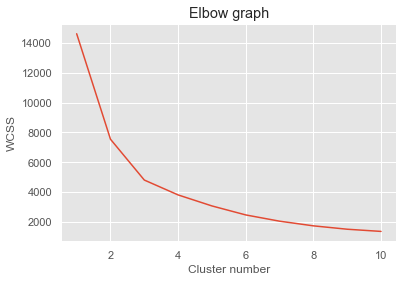

In [45]:
#Plot the elbow graph
plt.plot(range(1,11), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

By the elbow method we could determine that when the number of clusters is up to 4  we have the curve of the elbow graph which informs us that k=4 will be the best number of segments while making customers repartition.

# K-means clustering using RFM scores

In [46]:
import time
start = time.time()

#Apply K-means for the best k=4
km = KMeans(n_clusters=4)
clusters = km.fit(data_normalized)
cluster_labels = clusters.labels_
clusters = km.fit_predict(data_normalized)

end = time.time()
print(end - start)

0.15240001678466797


In [47]:
#Add the cluster number for every row
rfmTable['cluster'] = clusters

In [48]:
    c1 = rfmTable[rfmTable.cluster == 0]
    c2 = rfmTable[rfmTable.cluster == 1]
    c3 = rfmTable[rfmTable.cluster == 2]
    c4 = rfmTable[rfmTable.cluster == 3]

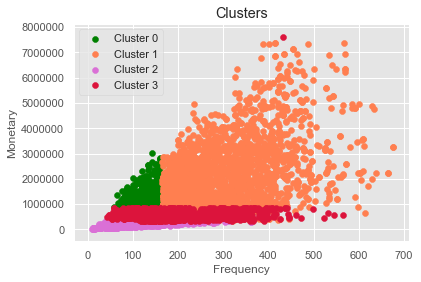

In [49]:
#Plot the clusters by Frequency and Monetary 
plt.scatter(c1.Frequency, c1.Monetary, c = 'green', label = 'Cluster 0')
plt.scatter(c2.Frequency, c2.Monetary, c = 'coral', label = 'Cluster 1')
plt.scatter(c3.Frequency, c3.Monetary, c = 'orchid', label = 'Cluster 2')
plt.scatter(c4.Frequency, c4.Monetary, c = 'crimson', label = 'Cluster 3')

plt.title('Clusters')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend()
plt.show()

Plotting the clustering results applying k-means based on frequency vs monetary shows that the clusters are spread out on low and high values of R and M.
For the first sight we could absolutely determine that the best cluster is the cluster 1 because its monetary and frequency are the highest.

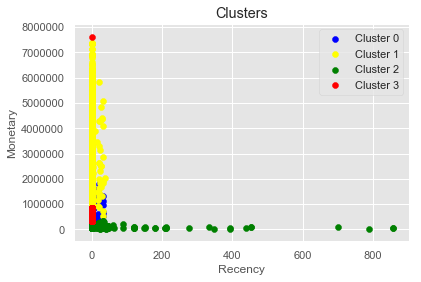

In [50]:
plt.scatter(c1.Recency, c1.Monetary, c = 'blue', label = 'Cluster 0')
plt.scatter(c2.Recency, c2.Monetary, c = 'yellow', label = 'Cluster 1')
plt.scatter(c3.Recency, c3.Monetary, c = 'green', label = 'Cluster 2')
plt.scatter(c4.Recency, c4.Monetary, c = 'red', label = 'Cluster 3')

plt.title('Clusters')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend()

In [51]:
data_rfm = rfmTableScores.assign(Cluster=cluster_labels)

In [52]:
grouped = data_rfm.groupby(['Cluster'])
grouped.agg({
    'r_score': 'mean',
    'f_score': 'mean',
    'm_score': 'mean'
  }).round(1)

,r_score,f_score,m_score
Cluster,,,
0,3.9,4.2,4.3
1,1.2,2.9,2.3
2,2.6,1.6,1.1
3,4.0,1.8,3.4


In this link: https://cran.r-project.org/web/packages/rfm/vignettes/rfm-customer-level-data.html
We find out that the segmentation could be based on 4 clusters named best, loyal, risky, and About to sleep.

So, based on the calculated scores of RFM for every cluster we could estimate the 4 needed classes that we will name best, 
Loyal, Risky, and About to sleep customers in order to represent all the kinds of customers we can find and by grouping the 10 
clusters found in only 4 clusters representing the best number of clusters and the classes needed for segmentation.

The Best segment correspond to those who bought recently, buy often and spend the most
That's why we assign for the cluster 1 the Best class with the highest scores R (3.9), F (4.1), and M (4.2) 

The Loyal segment correspond to the recent customers, who spend good amount, and buy more than once
That's why we assign for the cluster 0 the Loyal class with high R (4.2), F (1.7), and M (3.5)

The Risky segment correspond to those who spend big money, purchase often but long time ag
That's why we assign for the cluster 2 the Risky class with R (1.2), F (2.9), and M (2.4) 

The About to sleep segment correspond to those who have lowest recency, frequency & monetary scores 
That's why we assign for the cluster 3 the About to sleep class with R (2.6), F (1.6), and M (1.1)

# Snake plot of the 4 clusters by their RFM scores

In [53]:
data_melt = pd.melt(
                    data_rfm.reset_index(),               
                    id_vars=['client_id', 'Cluster'],
                    value_vars=['r_score', 'f_score', 'm_score'], 
                    var_name='Metric', value_name='Value'
                    )

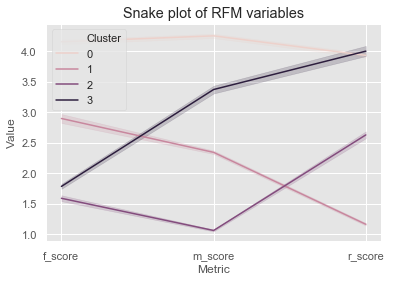

In [54]:
# Snake Plot
plt.title('Snake plot of RFM variables')
plt.xlabel('Metric')
plt.ylabel('Value')
sns.lineplot(data=data_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

Now, the snake plot will ensure our deductions and explain for more the 4 classes by the R, F, and M score of everyone of them.
As we see in the figure above the cluster 1 is the Best cluster, then we find the potential Loyal cluster 3, hence we see that the at Risk cluster 2, and finally the About to sleep cluster 0 with low RFM scores 

In [55]:
tmp['cluster'] = clusters

In [56]:
tmp

,x,y,cluster
0,-0.689296,2.154797,3
1,0.917609,1.507146,3
2,0.917609,1.507146,3
3,2.073383,0.520197,3
4,0.917609,1.507146,3
5,1.344171,1.142893,3
6,0.917609,1.507146,3
7,1.344171,1.142893,3
8,2.073383,0.520197,3
9,1.344171,1.142893,3


In [57]:
tmp['cluster'] = clusters

In [58]:
c1 = tmp[tmp.cluster == 0]
c2 = tmp[tmp.cluster == 1]
c3 = tmp[tmp.cluster == 2]
c4 = tmp[tmp.cluster == 3]

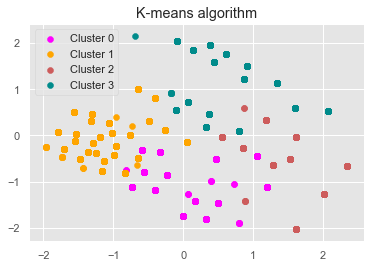

In [59]:
plt.scatter(c1.x, c1.y, c = 'magenta', label = 'Cluster 0')
plt.scatter(c2.x, c2.y, c = 'orange', label = 'Cluster 1')
plt.scatter(c3.x, c3.y, c = 'indianred', label = 'Cluster 2')
plt.scatter(c4.x, c4.y, c = 'darkcyan', label = 'Cluster 3')

plt.title('K-means algorithm')
plt.legend()

For K-means algorithm we note that the execution time is (0.2 sec) and especially when the number of k is small. But, clusters are not well partionated because we see some labels of a cluster disposed closely to other clusters because of densities variation which is the main limitation of k-means that it does not work well with different densities. 

# GMM clustering using RFM score table

In [60]:
from sklearn.mixture import GaussianMixture

import time
start = time.time()

gmm = GaussianMixture(n_components=4).fit(reduced)
labels = gmm.predict(reduced)

end = time.time()
print(end - start)

0.15003395080566406


In [61]:
tmp['cluster'] = labels

In [62]:
c1 = tmp[tmp.cluster == 0]
c2 = tmp[tmp.cluster == 1]
c3 = tmp[tmp.cluster == 2]
c4 = tmp[tmp.cluster == 3]

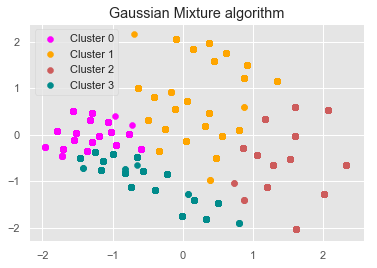

In [63]:
plt.scatter(c1.x, c1.y, c = 'magenta', label = 'Cluster 0')
plt.scatter(c2.x, c2.y, c = 'orange', label = 'Cluster 1')
plt.scatter(c3.x, c3.y, c = 'indianred', label = 'Cluster 2')
plt.scatter(c4.x, c4.y, c = 'darkcyan', label = 'Cluster 3')

plt.title('Gaussian Mixture algorithm')
plt.legend()

Gaussian mixture algorithm is based on mathematical computations to find labels and calculate centers. GMM is more flexible than k-means in terms of cluster covariance and much faster than it (0.1 sec). But, when we see in the figure above we find that the labels are very close sometimes.

In [64]:
#Applying EM algorithm
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

In [65]:
import time
start = time.time()

centers, labels = find_clusters(reduced, 4)

end = time.time()
print(end - start)

0.01500082015991211


In [66]:
tmp['cluster'] = labels

In [67]:
c1 = tmp[tmp.cluster == 0]
c2 = tmp[tmp.cluster == 1]
c3 = tmp[tmp.cluster == 2]
c4 = tmp[tmp.cluster == 3]

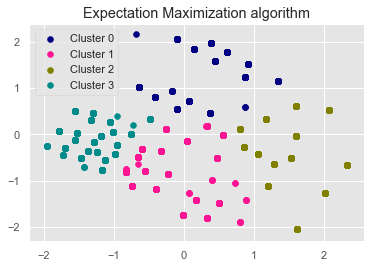

In [68]:
plt.scatter(c1.x, c1.y, c = 'navy', label = 'Cluster 0')
plt.scatter(c2.x, c2.y, c = 'deeppink', label = 'Cluster 1')
plt.scatter(c3.x, c3.y, c = 'olive', label = 'Cluster 2')
plt.scatter(c4.x, c4.y, c = 'darkcyan', label = 'Cluster 3')

plt.title('Expectation Maximization algorithm')
plt.legend()

Well, for the Expectation maximization algorithm we see that the execution time is interesting (0.01 sec) with a beautifull repartition and equally divided clusters using reduced data of RFM scores. Also, EM algorithm uses log likelihood in every iteration to increase precision though it uses forward probabilities and it is more dependent on all sequences to exhibit the results.

# Mean Shift algorithm with RFM data 

In [69]:
#Mean Shift 
from sklearn.cluster import MeanShift, estimate_bandwidth

In [70]:
import time
start = time.time()

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(reduced, quantile=0.21, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(reduced)

end = time.time()
print(end - start)

0.10497164726257324


In [71]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

In [72]:
print("Number of estimated clusters : %d" % n_clusters_)

Number of estimated clusters : 4


In [73]:
tmp['cluster'] = labels

In [74]:
c1 = tmp[tmp.cluster == 0]
c2 = tmp[tmp.cluster == 1]
c3 = tmp[tmp.cluster == 2]
c4 = tmp[tmp.cluster == 3]

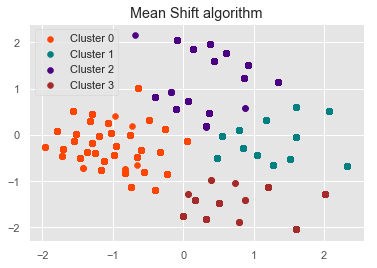

In [75]:
plt.scatter(c1.x, c1.y, c = 'orangered', label = 'Cluster 0')
plt.scatter(c2.x, c2.y, c = 'teal', label = 'Cluster 1')
plt.scatter(c3.x, c3.y, c = 'indigo', label = 'Cluster 2')
plt.scatter(c4.x, c4.y, c = 'brown', label = 'Cluster 3')

plt.title('Mean Shift algorithm')
plt.legend()

Mean shift algorithm uses reduced data of RFM scores converted to 2D so we find 4 clusters with 0.2 sec of execution time and we see a beautiful disposition of the clusters but an important computational time.

# DBSACN with RFM data scores

In [76]:
from sklearn.cluster import DBSCAN

In [77]:
import time
start = time.time()

db = DBSCAN(eps=0.8, min_samples=300).fit(data_normalized)

end = time.time()
print(end - start)

0.18493890762329102


In [78]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
lab = db.labels_

In [79]:
n_clusters_ = len(set(lab)) - (1 if -1 in lab else 0)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 4


In [80]:
tmp['cluster'] = lab

In [81]:
c1 = tmp[tmp.cluster == 0]
c2 = tmp[tmp.cluster == 1]
c3 = tmp[tmp.cluster == 2]
c4 = tmp[tmp.cluster == 3]

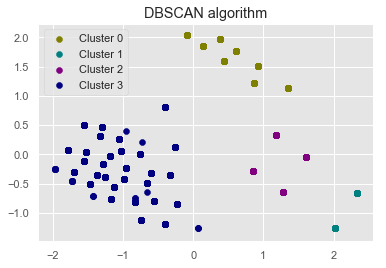

In [82]:
plt.scatter(c1.x, c1.y, c = 'olive', label = 'Cluster 0')
plt.scatter(c2.x, c2.y, c = 'teal', label = 'Cluster 1')
plt.scatter(c3.x, c3.y, c = 'purple', label = 'Cluster 2')
plt.scatter(c4.x, c4.y, c = 'navy', label = 'Cluster 3')

plt.title('DBSCAN algorithm')
plt.legend()

DBSCAN algorithm is a bit lower than other algorithms with 0.2 sec of excecution time but we could affirm that it is the only algorithms that deal with the variety of density into customers or clusters so we find a real repartition by densities of the customers per cluster especially using the real RFM table data not a converted 2D reduced table.

    Algorithm          |   Execution time
---------------------------------------------
    K-means            |     0.16 sec
    GMM                |     0.07 sec
    EM                 |     0.01 sec
    Mean Shift         |     0.20 sec
    DBSCAN             |     0.25 sec

So, through the table showing the execution time of each algorithm we find out in our case and for our dataset Expectation maximization is absolutely the best algorithm used for clustering.
Now, we could move on to try precision of each algorithm.

# Acuuracy results

In [83]:
y = tmp['cluster'].values

In [84]:
aux = tmp.drop('cluster', axis=1)

In [85]:
X = aux.values.astype(np.float)

In [86]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.30, random_state=50)

## K-means accuracy

In [88]:
km.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [89]:
labels = km.predict(X_test)

In [90]:
score = metrics.accuracy_score(y_test,labels)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.101846


## Gaussian Mixture algorithm

In [91]:
gmm.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [92]:
labels = gmm.predict(X_test)

In [93]:
score = metrics.accuracy_score(y_test,labels)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.442925


## Mean Shift algorithm

In [94]:
ms.fit(X_train)

MeanShift(bandwidth=1.0362062553532183, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=None, seeds=None)

In [95]:
labels = ms.predict(X_test)

In [96]:
score = metrics.accuracy_score(y_test,labels)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.079973


Expectation Maximization algorithm is not predefined so it has not a predict method and hence we could not apply the accuracy_score method to calculate its accuracy but we coul confirm its rapidity and the interesting partioning it gave us.

DBSCAN also has not a predict method that's why we can not calculate its accuracy nevertheless it is the most important algorithm while dealing with real RFM score attributes and considering densities variation of labels though its latency. 

     Algorithm         |    Accuracy
-------------------------------------------
    K-means            |     0.11
    GMM                |     0.26
    Mean Shift         |     0.35

Accuracy score shows that the best algorithm used having the highest accuracy 0.35 is Mean Shift in front of k-means and GMM.
Without forgetting that EM was the fastest algorithm in execution time working on reduced RFM data and providing a good partionning of clusters and their labels.
Also, DBSCAN who work on real RFM scores and gave us an interesting disposition of the estimated 4 clusters considering the different densities so the clusters are easily differentiated but with an important computational time.